<a href="https://colab.research.google.com/github/nishabhati12/youtube-comments-spam-classifier/blob/master/TourPackage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)

plt.style.use('ggplot')

from pandas_profiling import ProfileReport


from tabulate import tabulate
%matplotlib inline

In [ ]:
Tourism = pd.read_csv('tour_package.csv')
data= Tourism.copy()
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000,Self Enquiry,3,6.000,Salaried,Female,3,3.000,Deluxe,3.000,Single,1.000,1,2,1,0.000,Manager,20993.000
1,200001,0,49.000,Company Invited,1,14.000,Salaried,Male,3,4.000,Deluxe,4.000,Divorced,2.000,0,3,1,2.000,Manager,20130.000
2,200002,1,37.000,Self Enquiry,1,8.000,Free Lancer,Male,3,4.000,Basic,3.000,Single,7.000,1,3,0,0.000,Executive,17090.000
3,200003,0,33.000,Company Invited,1,9.000,Salaried,Female,2,3.000,Basic,3.000,Divorced,2.000,1,5,1,1.000,Executive,17909.000
4,200004,0,NaN,Self Enquiry,1,8.000,Small Business,Male,2,3.000,Basic,4.000,Divorced,1.000,0,5,1,0.000,Executive,18468.000


In [ ]:
df_null_summary = pd.concat([data.isnull().sum(), data.isnull().sum() * 100/data.isnull().count() ], axis=1)
df_null_summary.columns = ['Null Record Count', 'Percentage of Null Records']
df_null_summary.sort_values(by= 'Percentage of Null Records', ascending=False).style.background_gradient(cmap ='YlOrRd')

,Null Record Count,Percentage of Null Records
DurationOfPitch,251,5.135025
MonthlyIncome,233,4.766776
Age,226,4.623568
NumberOfTrips,140,2.864157
NumberOfChildrenVisiting,66,1.350245
NumberOfFollowups,45,0.920622
PreferredPropertyStar,26,0.531915
TypeofContact,25,0.511457
Designation,0,0.000000
OwnCar,0,0.000000


Categorical column statistics

**Target vs. All Categorical Columns**

In [ ]:
print(data.shape)
data.head()

(4888, 20)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000,Self Enquiry,3,6.000,Salaried,Female,3,3.000,Deluxe,3.000,Single,1.000,1,2,1,0.000,Manager,20993.000
1,200001,0,49.000,Company Invited,1,14.000,Salaried,Male,3,4.000,Deluxe,4.000,Divorced,2.000,0,3,1,2.000,Manager,20130.000
2,200002,1,37.000,Self Enquiry,1,8.000,Free Lancer,Male,3,4.000,Basic,3.000,Single,7.000,1,3,0,0.000,Executive,17090.000
3,200003,0,33.000,Company Invited,1,9.000,Salaried,Female,2,3.000,Basic,3.000,Divorced,2.000,1,5,1,1.000,Executive,17909.000
4,200004,0,NaN,Self Enquiry,1,8.000,Small Business,Male,2,3.000,Basic,4.000,Divorced,1.000,0,5,1,0.000,Executive,18468.000


**Original**

In [ ]:
df=pd.read_csv('tour_package.csv')

In [ ]:
df.shape


(4888, 20)

**Univariate analysis**

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000,4888.000,4662.000,4888.000,4637.000,4888.000,4843.000,4862.000,4748.000,4888.000,4888.000,4888.000,4822.000,4655.000
mean,202443.500,0.188,37.622,1.654,15.491,2.905,3.708,3.581,3.237,0.291,3.078,0.620,1.187,23619.853
std,1411.188,0.391,9.316,0.917,8.520,0.725,1.003,0.798,1.849,0.454,1.366,0.485,0.858,5380.698
min,200000.000,0.000,18.000,1.000,5.000,1.000,1.000,3.000,1.000,0.000,1.000,0.000,0.000,1000.000
25%,201221.750,0.000,31.000,1.000,9.000,2.000,3.000,3.000,2.000,0.000,2.000,0.000,1.000,20346.000
50%,202443.500,0.000,36.000,1.000,13.000,3.000,4.000,3.000,3.000,0.000,3.000,1.000,1.000,22347.000
75%,203665.250,0.000,44.000,3.000,20.000,3.000,4.000,4.000,4.000,1.000,4.000,1.000,2.000,25571.000
max,204887.000,1.000,61.000,3.000,127.000,5.000,6.000,5.000,22.000,1.000,5.000,1.000,3.000,98678.000


In [ ]:
sns.set(style='whitegrid', palette='muted', color_codes=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
for cat_cols in df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list():
    print('Unique values and corresponding data counts for feature: '+cat_cols)
    print('-'*90)
    df_temp = pd.concat([df[cat_cols].value_counts(), df[cat_cols].value_counts(normalize=True)*100], axis=1)
    df_temp.columns = ['Count', 'Percentage']
    print(df_temp)
    print('-'*90)

Unique values and corresponding data counts for feature: TypeofContact
------------------------------------------------------------------------------------------
                 Count  Percentage
Self Enquiry      3444      70.820
Company Invited   1419      29.180
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Occupation
------------------------------------------------------------------------------------------
                Count  Percentage
Salaried         2368      48.445
Small Business   2084      42.635
Large Business    434       8.879
Free Lancer         2       0.041
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
         Count  Percentage
Male      2916      59.656
Female    181

In [ ]:
df.drop(columns=['CustomerID','ProductPitched','NumberOfChildrenVisiting', 'PreferredPropertyStar', 'NumberOfFollowups','DurationOfPitch','PitchSatisfactionScore'], inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,MaritalStatus,NumberOfTrips,Passport,OwnCar,Designation,MonthlyIncome
0,1,41.000,Self Enquiry,3,Salaried,Female,3,Single,1.000,1,1,Manager,20993.000
1,0,49.000,Company Invited,1,Salaried,Male,3,Divorced,2.000,0,1,Manager,20130.000
2,1,37.000,Self Enquiry,1,Free Lancer,Male,3,Single,7.000,1,0,Executive,17090.000
3,0,33.000,Company Invited,1,Salaried,Female,2,Divorced,2.000,1,1,Executive,17909.000
4,0,NaN,Self Enquiry,1,Small Business,Male,2,Divorced,1.000,0,1,Executive,18468.000


In [ ]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Single', 'Unmarried').str.capitalize()
df['Gender'] = df['Gender'].str.replace(' ', '').str.capitalize()

In [ ]:
df.MaritalStatus.value_counts()
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

**Categorical column statistics after deleting unnecessary columns**

In [ ]:
for cat_cols in df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list():
    print('Unique values and corresponding data counts for feature: '+cat_cols)
    print('-'*90)
    df_temp = pd.concat([df[cat_cols].value_counts(), df[cat_cols].value_counts(normalize=True)*100], axis=1)
    df_temp.columns = ['Count', 'Percentage']
    print(df_temp)
    print('-'*90)

Unique values and corresponding data counts for feature: TypeofContact
------------------------------------------------------------------------------------------
                 Count  Percentage
Self Enquiry      3444      70.820
Company Invited   1419      29.180
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Occupation
------------------------------------------------------------------------------------------
                Count  Percentage
Salaried         2368      48.445
Small Business   2084      42.635
Large Business    434       8.879
Free Lancer         2       0.041
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
        Count  Percentage
Male     2916      59.656
Female   1972  

In [ ]:
category_columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']
df[category_columns] = df[category_columns].astype('category')
df.head()


,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,MaritalStatus,NumberOfTrips,Passport,OwnCar,Designation,MonthlyIncome
0,1,41.000,Self Enquiry,3,Salaried,Female,3,Unmarried,1.000,1,1,Manager,20993.000
1,0,49.000,Company Invited,1,Salaried,Male,3,Divorced,2.000,0,1,Manager,20130.000
2,1,37.000,Self Enquiry,1,Free Lancer,Male,3,Unmarried,7.000,1,0,Executive,17090.000
3,0,33.000,Company Invited,1,Salaried,Female,2,Divorced,2.000,1,1,Executive,17909.000
4,0,NaN,Self Enquiry,1,Small Business,Male,2,Divorced,1.000,0,1,Executive,18468.000


In [ ]:
df.Gender.value_counts()
df['Gender'] = df['Gender'].str.replace(' ','').str.capitalize()
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

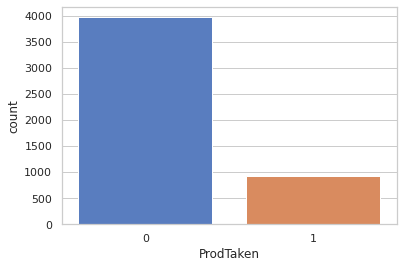

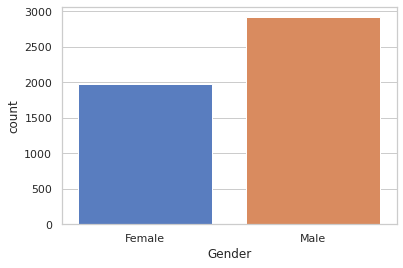

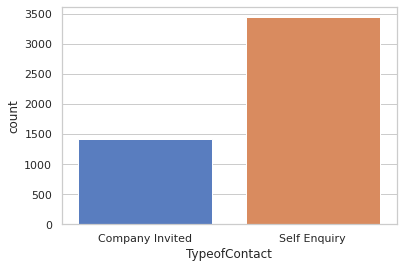

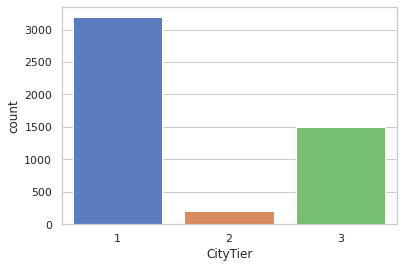

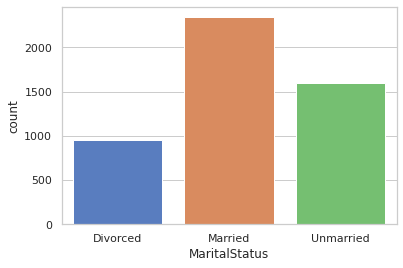

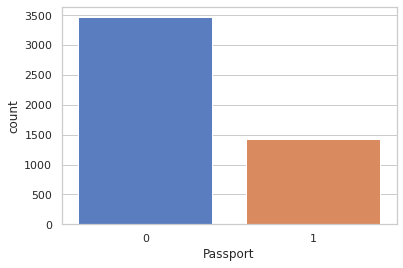

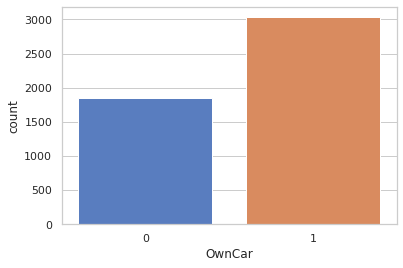

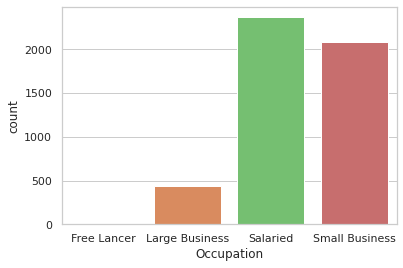

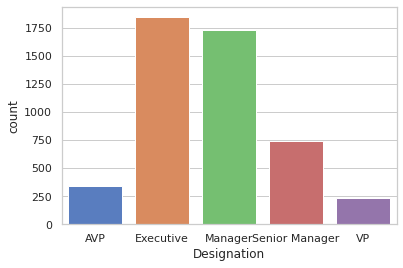

In [ ]:
sns.countplot(df.ProdTaken)
plt.show()

for col in ['Gender','TypeofContact','CityTier','MaritalStatus','Passport','OwnCar','Occupation','Designation']:
  sns.countplot(df[col])
  plt.show()
  """
  sns.countplot(df.ProdTaken, hue=df.Gender)
  plt.show()
  sns.countplot(df.ProdTaken, hue=df.TypeofContact)
  plt.show()
  sns.countplot(df.ProdTaken, hue=df.CityTier)
  plt.show()
  sns.countplot(df.ProdTaken, hue=df.MaritalStatus)
  plt.show()
  sns.countplot(df.ProdTaken, hue=df.Passport)
  plt.show()
  sns.countplot(df.ProdTaken, hue=df.OwnCar)
  plt.show()
  sns.countplot(df.ProdTaken, hue=df.Occupation)
  plt.show()
  sns.countplot(df.ProdTaken, hue=df.Designation)
  plt.show()
  """

In [ ]:
"""category_columns = df.select_dtypes(include='category').columns.tolist()
target_variable ='ProdTaken'
perc_on_bar(df, category_columns, target_variable)"""

"category_columns = df.select_dtypes(include='category').columns.tolist()\ntarget_variable ='ProdTaken'\nperc_on_bar(df, category_columns, target_variable)"

In [ ]:
category_columns=['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Gender',
 'Occupation',
 'MaritalStatus',
 'Passport',
 'OwnCar',
 'Designation']
category_columns

['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Gender',
 'Occupation',
 'MaritalStatus',
 'Passport',
 'OwnCar',
 'Designation']

In [ ]:
numerical_columns = ['Age', 'NumberOfPersonVisiting', 'MonthlyIncome','NumberOfTrips']
target_variable ='ProdTaken'
numerical_columns
#perc_on_bar(df, numerical_columns, target_variable)

['Age', 'NumberOfPersonVisiting', 'MonthlyIncome', 'NumberOfTrips']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ProdTaken               4888 non-null   category
 1   Age                     4662 non-null   float64 
 2   TypeofContact           4863 non-null   category
 3   CityTier                4888 non-null   category
 4   Occupation              4888 non-null   category
 5   Gender                  4888 non-null   object  
 6   NumberOfPersonVisiting  4888 non-null   int64   
 7   MaritalStatus           4888 non-null   category
 8   NumberOfTrips           4748 non-null   float64 
 9   Passport                4888 non-null   category
 10  OwnCar                  4888 non-null   category
 11  Designation             4888 non-null   category
 12  MonthlyIncome           4655 non-null   float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 230.4+ KB


In [ ]:
target_variable ='ProdTaken'
#perc_on_bar(df, numerical_columns, target_variable)

***By Graph Checking the density***

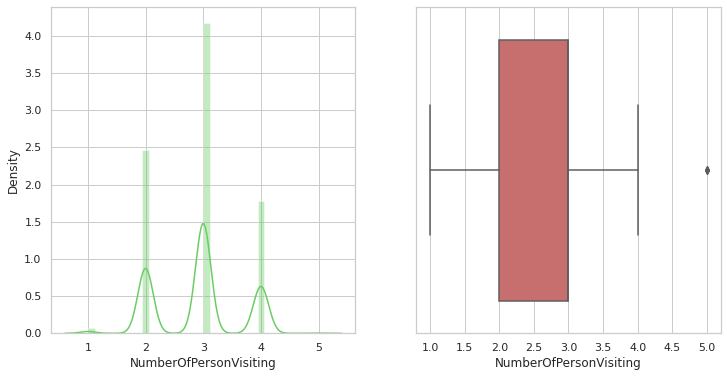

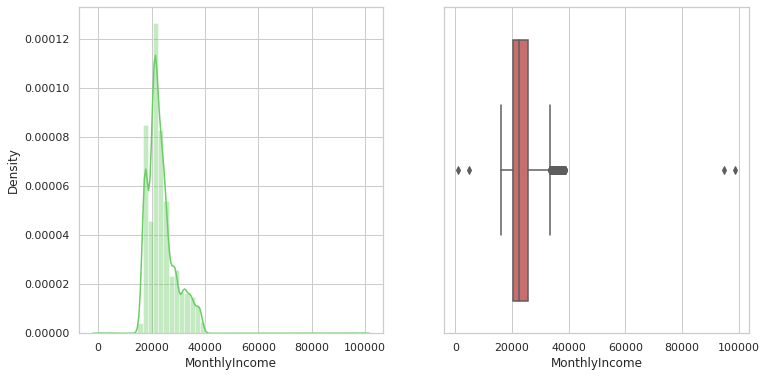

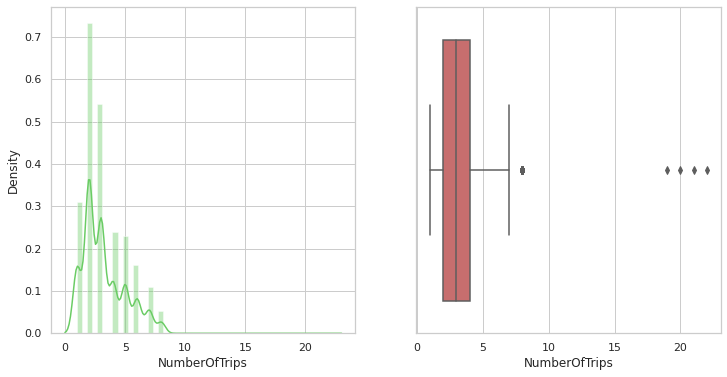

In [ ]:
for col in numerical_columns[1:]:
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  sns.distplot(df[col], hist=True, kde=True, color='g')
  plt.subplot(1,2,2)
  sns.boxplot(df[col], color='r')
  plt.show()

# plt.subplots(1,2, figsize=(12,6))
# sns.distplot(df.Age, hist=True, kde=True, color='g')
# #axes[0].set_title("Distribution of ages")



# sns.boxplot(df.Age, color='r')
# #axes[1].set_title("range of ages")
# plt.show()

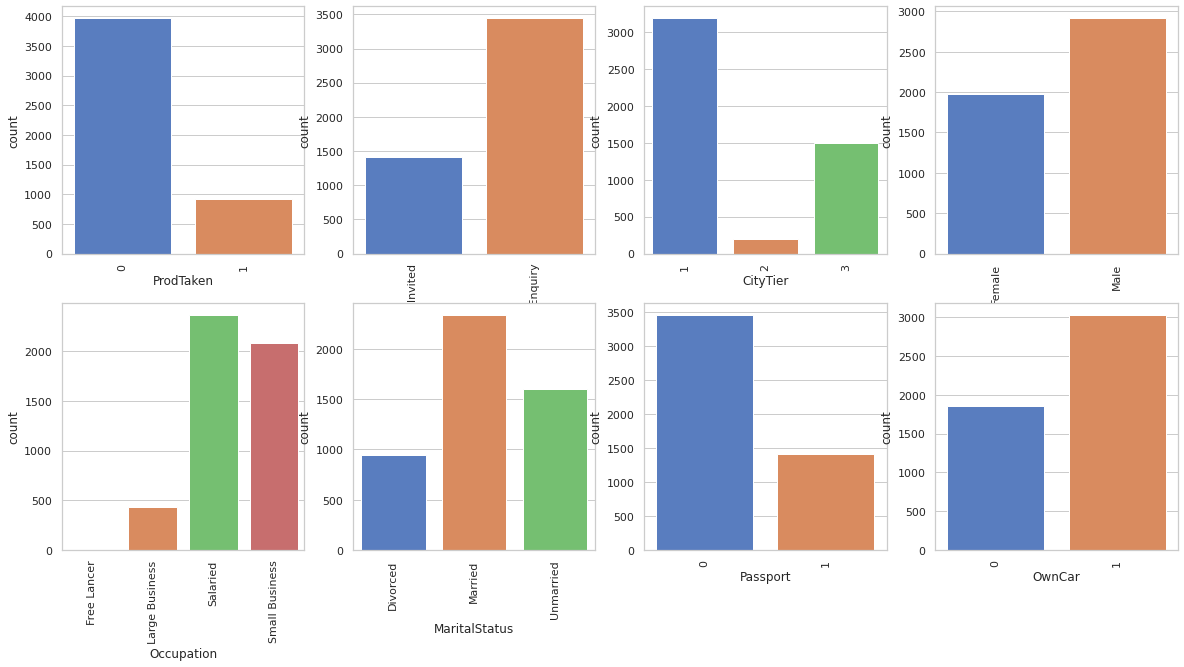

In [ ]:
#for col in category_columns[1:]:
 # plt.figure(figsize=(12,6))
  #plt.subplot(1,2,1)
  #sns.countplot(category_columns[col])
  #plt.show()


fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(category_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

**Crosstab for categorical to categorical**


---



In [ ]:

for i, subplot in zip(category_columns, ax.flatten()):
  for j, subplot in zip(category_columns[2:], ax.flatten()):
    s=pd.crosstab(df[i], df[j], margins=True, margins_name="Total")
    print(s)
    print("--"*40)
  

CityTier      1    2     3  Total
ProdTaken                        
0          2670  152  1146   3968
1           520   46   354    920
Total      3190  198  1500   4888
--------------------------------------------------------------------------------
Gender     Female  Male  Total
ProdTaken                     
0            1630  2338   3968
1             342   578    920
Total        1972  2916   4888
--------------------------------------------------------------------------------
Occupation  Free Lancer  Large Business  Salaried  Small Business  Total
ProdTaken                                                               
0                     0             314      1954            1700   3968
1                     2             120       414             384    920
Total                 2             434      2368            2084   4888
--------------------------------------------------------------------------------
MaritalStatus  Divorced  Married  Unmarried  Total
ProdTaken       

***Graphical Representation of categorical column with Numerical columns(Age, Monthly income)***

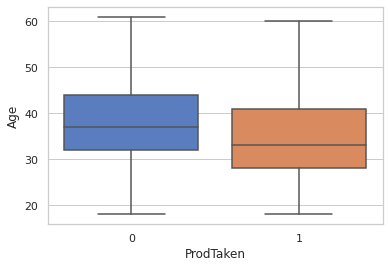

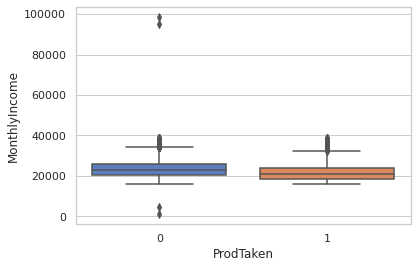

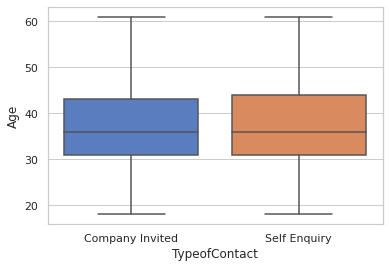

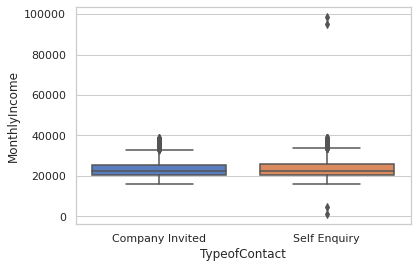

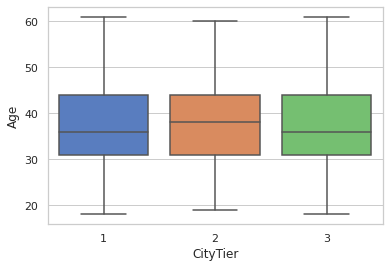

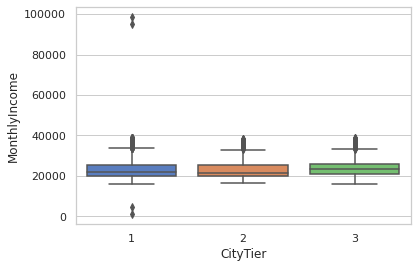

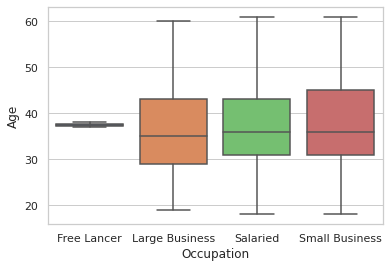

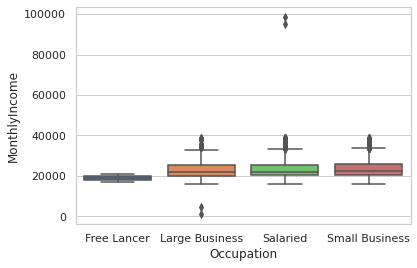

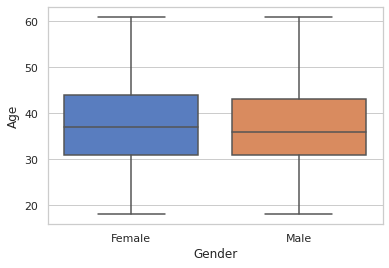

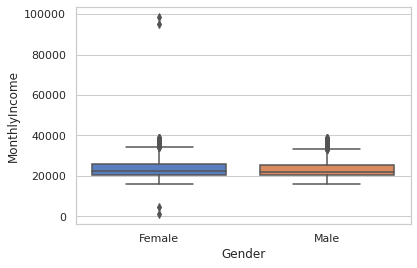

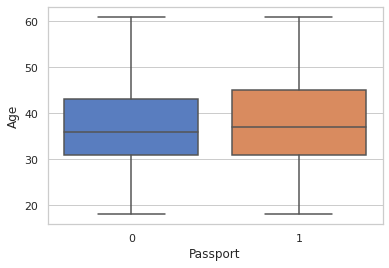

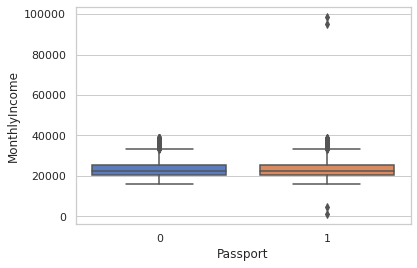

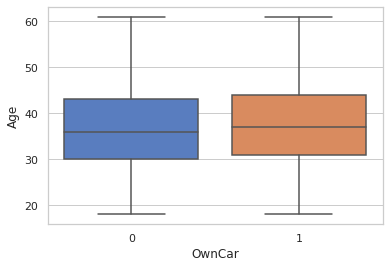

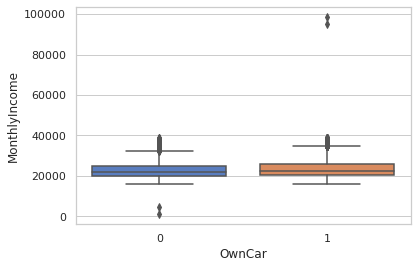

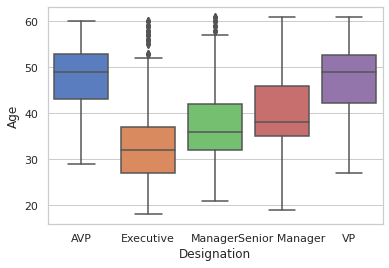

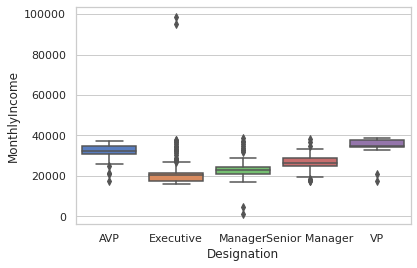

In [ ]:
for col in ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'Passport', 'OwnCar', 'Designation']:
  for col1 in ['Age', 'MonthlyIncome']:
    sns.boxplot(data = df , x = col , y = col1)
    plt.show()

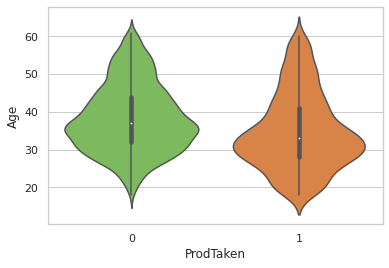

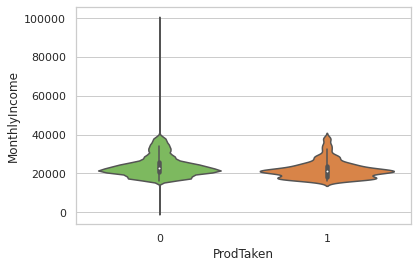

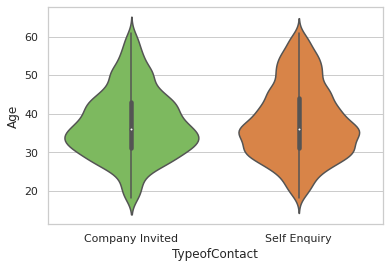

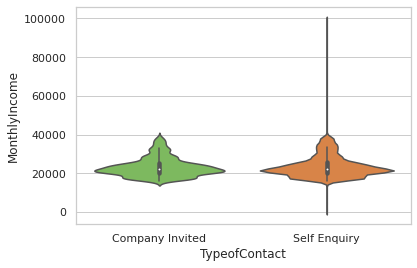

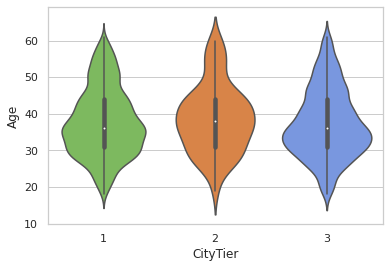

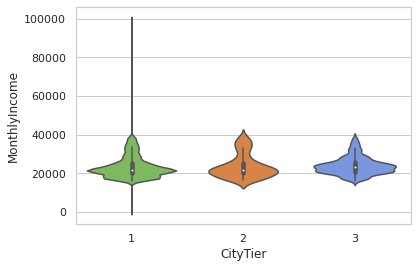

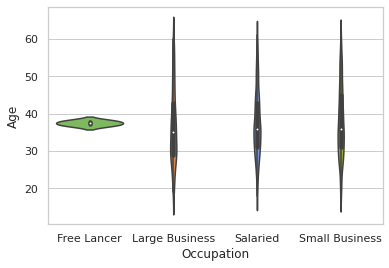

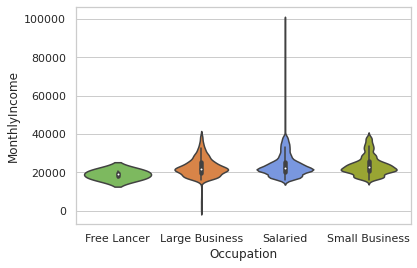

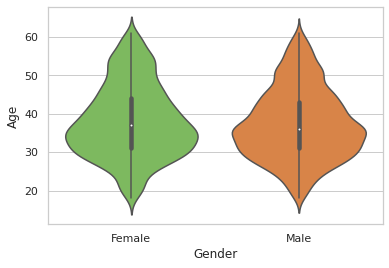

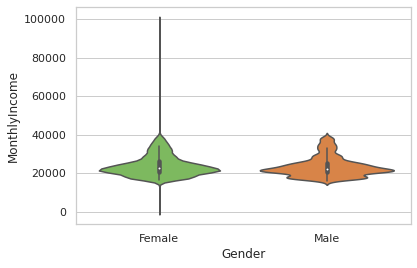

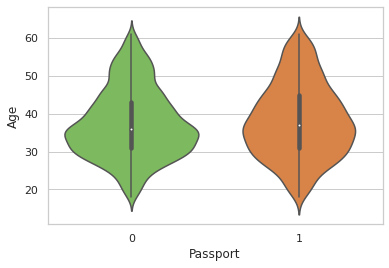

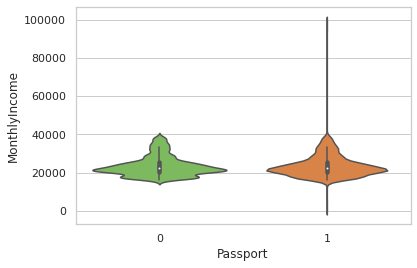

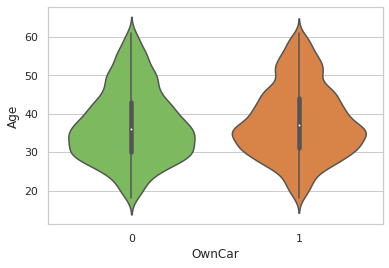

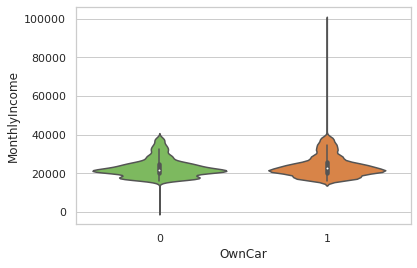

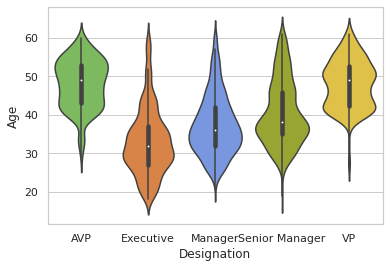

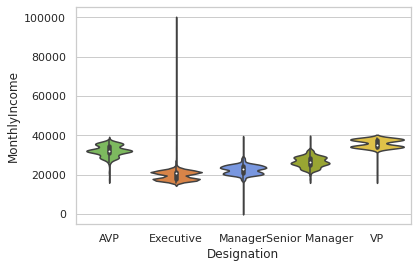

In [ ]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
for col in ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'Passport', 'OwnCar', 'Designation']:
  for col1 in ['Age', 'MonthlyIncome']:
    sns.violinplot(x=col, y=col1, data=df, palette=colors_list)
    plt.show()

Here I use Swarmplot, but it's not fruitful for this dataset

In [ ]:
"""for col in ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'Passport', 'OwnCar', 'Designation']:
  for col1 in ['Age', 'MonthlyIncome']:
    sns.swarmplot(x=col, y=col1, data=df)
    plt.show()"""

"for col in ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'Passport', 'OwnCar', 'Designation']:\n  for col1 in ['Age', 'MonthlyIncome']:\n    sns.swarmplot(x=col, y=col1, data=df)\n    plt.show()"

Similarly barplot is not useful 

In [ ]:
"""for col in ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'Passport', 'OwnCar', 'Designation']:
  for col1 in ['Age', 'MonthlyIncome']:
    sns.barplot(x = col, y = col1, data = df)
    plt.show()"""

"for col in ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'Passport', 'OwnCar', 'Designation']:\n  for col1 in ['Age', 'MonthlyIncome']:\n    sns.barplot(x = col, y = col1, data = df)\n    plt.show()"

In [ ]:
"""for col in ['Age', 'DurationofPitch', 'NumberofPersonVisiting', 'NumberofFollowups', 'PreferredPropertyStar', 'NumberofTrips', 'MonthlyIncome']:
  for col1 in 'MonthlyIncome':
    plt.scatter(col, col1)
    plt.show()"""

"for col in ['Age', 'DurationofPitch', 'NumberofPersonVisiting', 'NumberofFollowups', 'PreferredPropertyStar', 'NumberofTrips', 'MonthlyIncome']:\n  for col1 in 'MonthlyIncome':\n    plt.scatter(col, col1)\n    plt.show()"

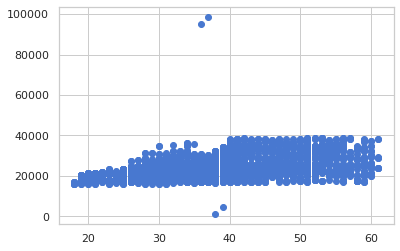

In [ ]:
plt.scatter(x='Age',y='MonthlyIncome',data=df)

**Missing value Treatment**

Checking null percentage

In [ ]:
print(len(df))
df.isnull().sum()/len(df)*100
#df["Age"] = df["Age"].interpolate(method='linear', limit_direction='forward', axis=0)
#df['Age'].median()
#df['Age'].isnull().sum()

4888


ProdTaken                0.000
Age                      4.624
TypeofContact            0.511
CityTier                 0.000
Occupation               0.000
Gender                   0.000
NumberOfPersonVisiting   0.000
MaritalStatus            0.000
NumberOfTrips            2.864
Passport                 0.000
OwnCar                   0.000
Designation              0.000
MonthlyIncome            4.767
dtype: float64

In [ ]:
df.nunique()

ProdTaken                    2
Age                         44
TypeofContact                2
CityTier                     3
Occupation                   4
Gender                       2
NumberOfPersonVisiting       5
MaritalStatus                3
NumberOfTrips               12
Passport                     2
OwnCar                       2
Designation                  5
MonthlyIncome             2475
dtype: int64

In [ ]:
a=df.Age.unique()
print(a)
print("=="*40)

b=df.TypeofContact.unique()
print(b)
print("=="*40)

"""c=df.DurationOfPitch.unique()
print(c)
print("=="*40)

d=df.NumberOfFollowups.unique()
print(d)
print("=="*40)

e=df.PreferredPropertyStar.unique()
print(e)
print("=="*40)"""

f=df.NumberOfTrips.unique()
print(f)
print("=="*40)

"""g=df.NumberOfChildrenVisiting.unique()
print(g)
print("=="*40)"""

f=df.MonthlyIncome.unique()
print(f)
print("=="*40)



[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]
['Self Enquiry', 'Company Invited', NaN]
Categories (2, object): ['Company Invited', 'Self Enquiry']
[ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. nan 20. 22.]
[20993. 20130. 17090. ... 22097. 22995. 21471.]


In [ ]:
df["MonthlyIncome"] = df["MonthlyIncome"].interpolate(method='linear', limit_direction='forward', axis=0)
re=df['MonthlyIncome'].median()
df['MonthlyIncome'].isnull().sum()
print(re)

22276.5


In [ ]:
"""df["TypeofContact"].mode()"""

'df["TypeofContact"].mode()'

In [ ]:
"""df["NumberOfTrips"].median()"""

'df["NumberOfTrips"].median()'

In [ ]:
df1=df.copy()
#print(df1)
from sklearn.impute import KNNImputer
df1 = df.copy(deep=True)
print(df1['Age'][4:34])

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df1['Age'] = knn_imputer.fit_transform(df1[['Age']])
#df1.dropna(subset=['Age'],how='any',inplace=True)
df1['Age'].isnull().sum()
#df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)
#df['NumberOfFollowups'].isnull().sum()
print(df1['Age'][4:34])

4       NaN
5    32.000
6    59.000
7    30.000
8    38.000
9    36.000
10   35.000
11      NaN
12   31.000
13   34.000
14   28.000
15   29.000
16   32.000
17   22.000
18   53.000
19      NaN
20      NaN
21      NaN
22   34.000
23   21.000
24   34.000
25   53.000
26      NaN
27   42.000
28   44.000
29   46.000
30   33.000
31   44.000
32   30.000
33   39.000
Name: Age, dtype: float64
4    37.622
5    32.000
6    59.000
7    30.000
8    38.000
9    36.000
10   35.000
11   37.622
12   31.000
13   34.000
14   28.000
15   29.000
16   32.000
17   22.000
18   53.000
19   37.622
20   37.622
21   37.622
22   34.000
23   21.000
24   34.000
25   53.000
26   37.622
27   42.000
28   44.000
29   46.000
30   33.000
31   44.000
32   30.000
33   39.000
Name: Age, dtype: float64


In [ ]:
#print(df['Age'][4:34])
def imp(x):
  if pd.isnull(x['Age']):
    for des in df['Designation'].unique():
      for mar in df['MaritalStatus'].unique():
        if x['MaritalStatus'] == mar and x['Designation'] == des:
          return df['Age'][(df['Designation']==des)&(df['MaritalStatus']==mar)].mean()
  else:
    return x['Age']

In [ ]:
df['Age']=df[['Age','Designation','MaritalStatus']].apply(imp, axis=1)
print(df['Age'][4:34])

4    34.573
5    32.000
6    59.000
7    30.000
8    38.000
9    36.000
10   35.000
11   37.430
12   31.000
13   34.000
14   28.000
15   29.000
16   32.000
17   22.000
18   53.000
19   30.913
20   37.600
21   37.430
22   34.000
23   21.000
24   34.000
25   53.000
26   30.913
27   42.000
28   44.000
29   46.000
30   33.000
31   44.000
32   30.000
33   39.000
Name: Age, dtype: float64


In [ ]:
def mi(x):
  if pd.isnull(x['MonthlyIncome']):
    for des in df['Designation'].unique():
      for mar in df['Age'].unique():
        if x['Age'] == ag and x['Designation'] == des:
          return df['MonthlyIncome'][(df['Designation']==des)&(df['Age']==ag)].mean()
  else:
    return x['MonthlyIncome']

In [ ]:
df['MonthlyIncome']=df[['MonthlyIncome','Designation','Age']].apply(mi, axis=1)
print(df['MonthlyIncome'][4:34])

4    18468.000
5    18068.000
6    17670.000
7    17693.000
8    24526.000
9    20237.000
10   17426.000
11   17668.500
12   17911.000
13   17661.000
14   17028.000
15   24980.000
16   18298.000
17   17935.000
18   30427.000
19   26420.333
20   22413.667
21   18407.000
22   26994.000
23   16232.000
24   17960.000
25   34094.000
26   27959.500
27   21825.000
28   25248.000
29   33947.000
30   17496.000
31   21465.000
32   17206.000
33   17086.000
Name: MonthlyIncome, dtype: float64


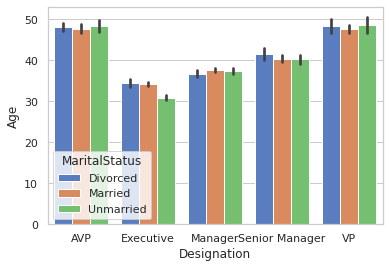

In [ ]:
sns.barplot(data=df, x='Designation', y='Age', hue='MaritalStatus')

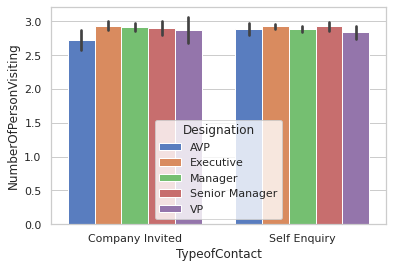

In [ ]:
sns.barplot(data=df, x='TypeofContact', y='NumberOfPersonVisiting', hue='Designation')

In [ ]:
#print(df['TypeofContact'][1000:1200])
def tc(x):
  if pd.isnull(x['TypeofContact']):
  # if isinstance(x['TypeofContact'],pd.Series):
    for DOP in df['Designation'].unique():
      for NOP in df['NumberOfPersonVisiting'].unique():
        if x['NumberOfPersonVisiting'] == NOP and x['Designation'] == DOP:
          return df['TypeofContact'][(df['Designation']==DOP)&(df['NumberOfPersonVisiting']==NOP)].mode().tolist()[0]
          
  else:
    return x['TypeofContact']

In [ ]:
df.TypeofContact.unique()

['Self Enquiry', 'Company Invited', NaN]
Categories (2, object): ['Company Invited', 'Self Enquiry']

In [ ]:
def treat(x):
  if isinstance(x['TypeofContact'], pd.Series):
    return x['TypeofContact'].values[0]
  return x['TypeofContact']

df['TypeofContact'] = df[['TypeofContact']].apply(treat,axis=1)

In [ ]:
df['TypeofContact']=df[['TypeofContact','Designation','NumberOfPersonVisiting']].apply(tc, axis=1)
# print(df['TypeofContact'][1000:1020])



In [ ]:
pd.Series(['a','b','a']).mode().tolist()[0]

'a'

In [ ]:
df['TypeofContact'].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

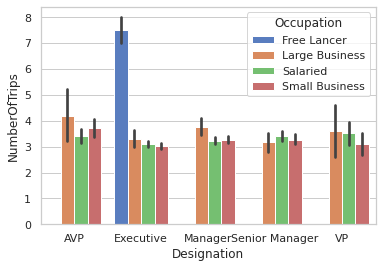

In [ ]:
sns.barplot(data=df, x='Designation', y='NumberOfTrips', hue='Occupation')

In [ ]:
#print(df['NumberOfTrips'][4600:4800])
def NOT(x):
  if pd.isnull(x['NumberOfTrips']):
    for des in df['Designation'].unique():
      for occ in df['Occupation'].unique():
        if x['Occupation'] == occ and x['Designation'] == des:
          return df['NumberOfTrips'][(df['Designation']==des)&(df['Occupation']==occ)].mode()
          
  else:
    return x['NumberOfTrips']

In [ ]:
df['NumberOfTrips']=df[['NumberOfTrips','Designation','Occupation']].apply(NOT, axis=1)
df = df.round().astype({'NumberOfTrips':'int'})
print(df['NumberOfTrips'])

0       1
1       2
2       7
3       2
4       1
       ..
4883    2
4884    3
4885    7
4886    3
4887    3
Name: NumberOfTrips, Length: 4888, dtype: int64


In [ ]:
df_cpy=df.copy()

df_cpy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ProdTaken               4888 non-null   category
 1   Age                     4888 non-null   float64 
 2   TypeofContact           4888 non-null   object  
 3   CityTier                4888 non-null   category
 4   Occupation              4888 non-null   category
 5   Gender                  4888 non-null   object  
 6   NumberOfPersonVisiting  4888 non-null   int64   
 7   MaritalStatus           4888 non-null   category
 8   NumberOfTrips           4888 non-null   int64   
 9   Passport                4888 non-null   category
 10  OwnCar                  4888 non-null   category
 11  Designation             4888 non-null   category
 12  MonthlyIncome           4888 non-null   float64 
dtypes: category(7), float64(2), int64(2), object(2)
memory usage: 263.7+ KB


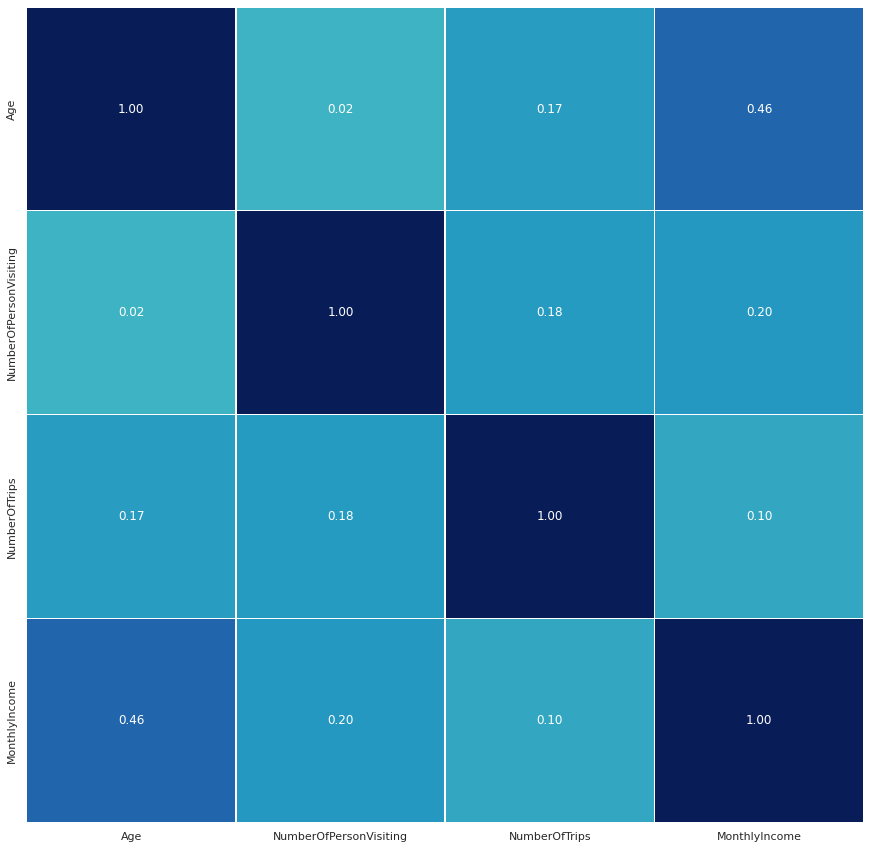

In [ ]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

In [ ]:
data.groupby(['ProductPitched']).agg({'MonthlyIncome':{'mean','min','max'},'Age':{'mean','min','max'}})

MonthlyIncome                        Age              
                         min       max      mean    min    max   mean
ProductPitched                                                       
Basic              16009.000 98678.000 19939.923 18.000 60.000 33.054
Deluxe              1000.000 38525.000 22643.158 21.000 61.000 37.382
King               17517.000 38677.000 35878.948 27.000 61.000 48.065
Standard           17372.000 38395.000 26637.749 19.000 61.000 40.582
Super Deluxe       17705.000 37502.000 32241.047 29.000 60.000 48.026

**Spliting Traning and Testing data**

In [ ]:
df.TypeofContact = pd.Series(df.TypeofContact, dtype="category")
df.TypeofContact


0          Self Enquiry
1       Company Invited
2          Self Enquiry
3       Company Invited
4          Self Enquiry
             ...       
4883       Self Enquiry
4884    Company Invited
4885       Self Enquiry
4886       Self Enquiry
4887       Self Enquiry
Name: TypeofContact, Length: 4888, dtype: category
Categories (2, object): ['Company Invited', 'Self Enquiry']

In [ ]:
df.Gender = pd.Series(df.Gender, dtype="category")
df.Gender

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
4883      Male
4884      Male
4885    Female
4886      Male
4887      Male
Name: Gender, Length: 4888, dtype: category
Categories (2, object): ['Female', 'Male']

In [ ]:
df_cpy = df.copy()

In [ ]:
X = df_cpy.drop(['ProdTaken'], axis=1)
y = df_cpy['ProdTaken']


print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True)*100)
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True)*100)

(4888, 12) (4888,)
(3421, 12) (1467, 12) (3421,) (1467,)
Percentage of classes in training set:
 0   81.760
1   18.240
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
 0   79.823
1   20.177
Name: ProdTaken, dtype: float64


In [ ]:
X_train[(X_train['MonthlyIncome'] > 40000) | (X_train['MonthlyIncome'] < 10000)]

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,MaritalStatus,NumberOfTrips,Passport,OwnCar,Designation,MonthlyIncome
38,36.000,Self Enquiry,1,Salaried,Female,2,Divorced,1,1,1,Executive,95000.000
2482,37.000,Self Enquiry,1,Salaried,Female,3,Divorced,2,1,1,Executive,98678.000
142,38.000,Self Enquiry,1,Large Business,Female,2,Unmarried,4,1,0,Manager,1000.000


In [ ]:
X_train[(X_train['NumberOfTrips'] > 10)]

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,MaritalStatus,NumberOfTrips,Passport,OwnCar,Designation,MonthlyIncome
816,39.000,Company Invited,1,Salaried,Male,3,Unmarried,21,0,1,Manager,21782.000
3260,40.000,Company Invited,1,Salaried,Male,4,Unmarried,22,0,1,Manager,25460.000
2829,31.000,Company Invited,1,Large Business,Male,3,Unmarried,20,1,1,Executive,20963.000


In [ ]:
X_train.isnull().sum()

Age                       0
TypeofContact             0
CityTier                  0
Occupation                0
Gender                    0
NumberOfPersonVisiting    0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
OwnCar                    0
Designation               0
MonthlyIncome             0
dtype: int64

In [ ]:
X_test.isnull().sum()

Age                       0
TypeofContact             0
CityTier                  0
Occupation                0
Gender                    0
NumberOfPersonVisiting    0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
OwnCar                    0
Designation               0
MonthlyIncome             0
dtype: int64

In [ ]:
X_train.head()

,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,MaritalStatus,NumberOfTrips,Passport,OwnCar,Designation,MonthlyIncome
3878,53.000,Company Invited,3,Salaried,Male,3,Married,4,0,1,Executive,22160.000
3933,39.000,Self Enquiry,1,Salaried,Male,3,Unmarried,7,1,0,Executive,22622.000
3,33.000,Company Invited,1,Salaried,Female,2,Divorced,2,1,1,Executive,17909.000
4823,20.000,Self Enquiry,3,Salaried,Male,4,Unmarried,2,1,1,Senior Manager,21672.000
4230,50.000,Self Enquiry,1,Large Business,Female,3,Unmarried,2,1,0,AVP,32642.000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 3878 to 235
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     3421 non-null   float64 
 1   TypeofContact           3421 non-null   category
 2   CityTier                3421 non-null   category
 3   Occupation              3421 non-null   category
 4   Gender                  3421 non-null   category
 5   NumberOfPersonVisiting  3421 non-null   int64   
 6   MaritalStatus           3421 non-null   category
 7   NumberOfTrips           3421 non-null   int64   
 8   Passport                3421 non-null   category
 9   OwnCar                  3421 non-null   category
 10  Designation             3421 non-null   category
 11  MonthlyIncome           3421 non-null   float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 161.5 KB


In [ ]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

Making Dummies

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 3878 to 235
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            3421 non-null   float64
 1   NumberOfPersonVisiting         3421 non-null   int64  
 2   NumberOfTrips                  3421 non-null   int64  
 3   MonthlyIncome                  3421 non-null   float64
 4   TypeofContact_Company Invited  3421 non-null   uint8  
 5   TypeofContact_Self Enquiry     3421 non-null   uint8  
 6   CityTier_1                     3421 non-null   uint8  
 7   CityTier_2                     3421 non-null   uint8  
 8   CityTier_3                     3421 non-null   uint8  
 9   Occupation_Free Lancer         3421 non-null   uint8  
 10  Occupation_Large Business      3421 non-null   uint8  
 11  Occupation_Salaried            3421 non-null   uint8  
 12  Occupation_Small Business      3421 non-null  

In [ ]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)



DecisionTreeClassifier(random_state=1)

GET SCORE

In [ ]:
dtree.score(X_test, y_test)

0.8725289706884799

In [ ]:
dtree.score(X_train, y_train)

1.0

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf= LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)


LogisticRegression()

***Confusion matrix***

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#True Positive is 1151
#True Negative is 20
#False Positive is 237
#False Negative is 59

[[1151   20]
 [ 237   59]]


In [ ]:
#Evaluate the model using other performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1171
           1       0.75      0.20      0.31       296

    accuracy                           0.82      1467
   macro avg       0.79      0.59      0.61      1467
weighted avg       0.81      0.82      0.78      1467



**Visualize the Decision Tree**

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'NumberOfPersonVisiting', 'NumberOfTrips', 'MonthlyIncome', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'CityTier_1', 'CityTier_2', 'CityTier_3', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female', 'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Passport_0', 'Passport_1', 'OwnCar_0', 'OwnCar_1', 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


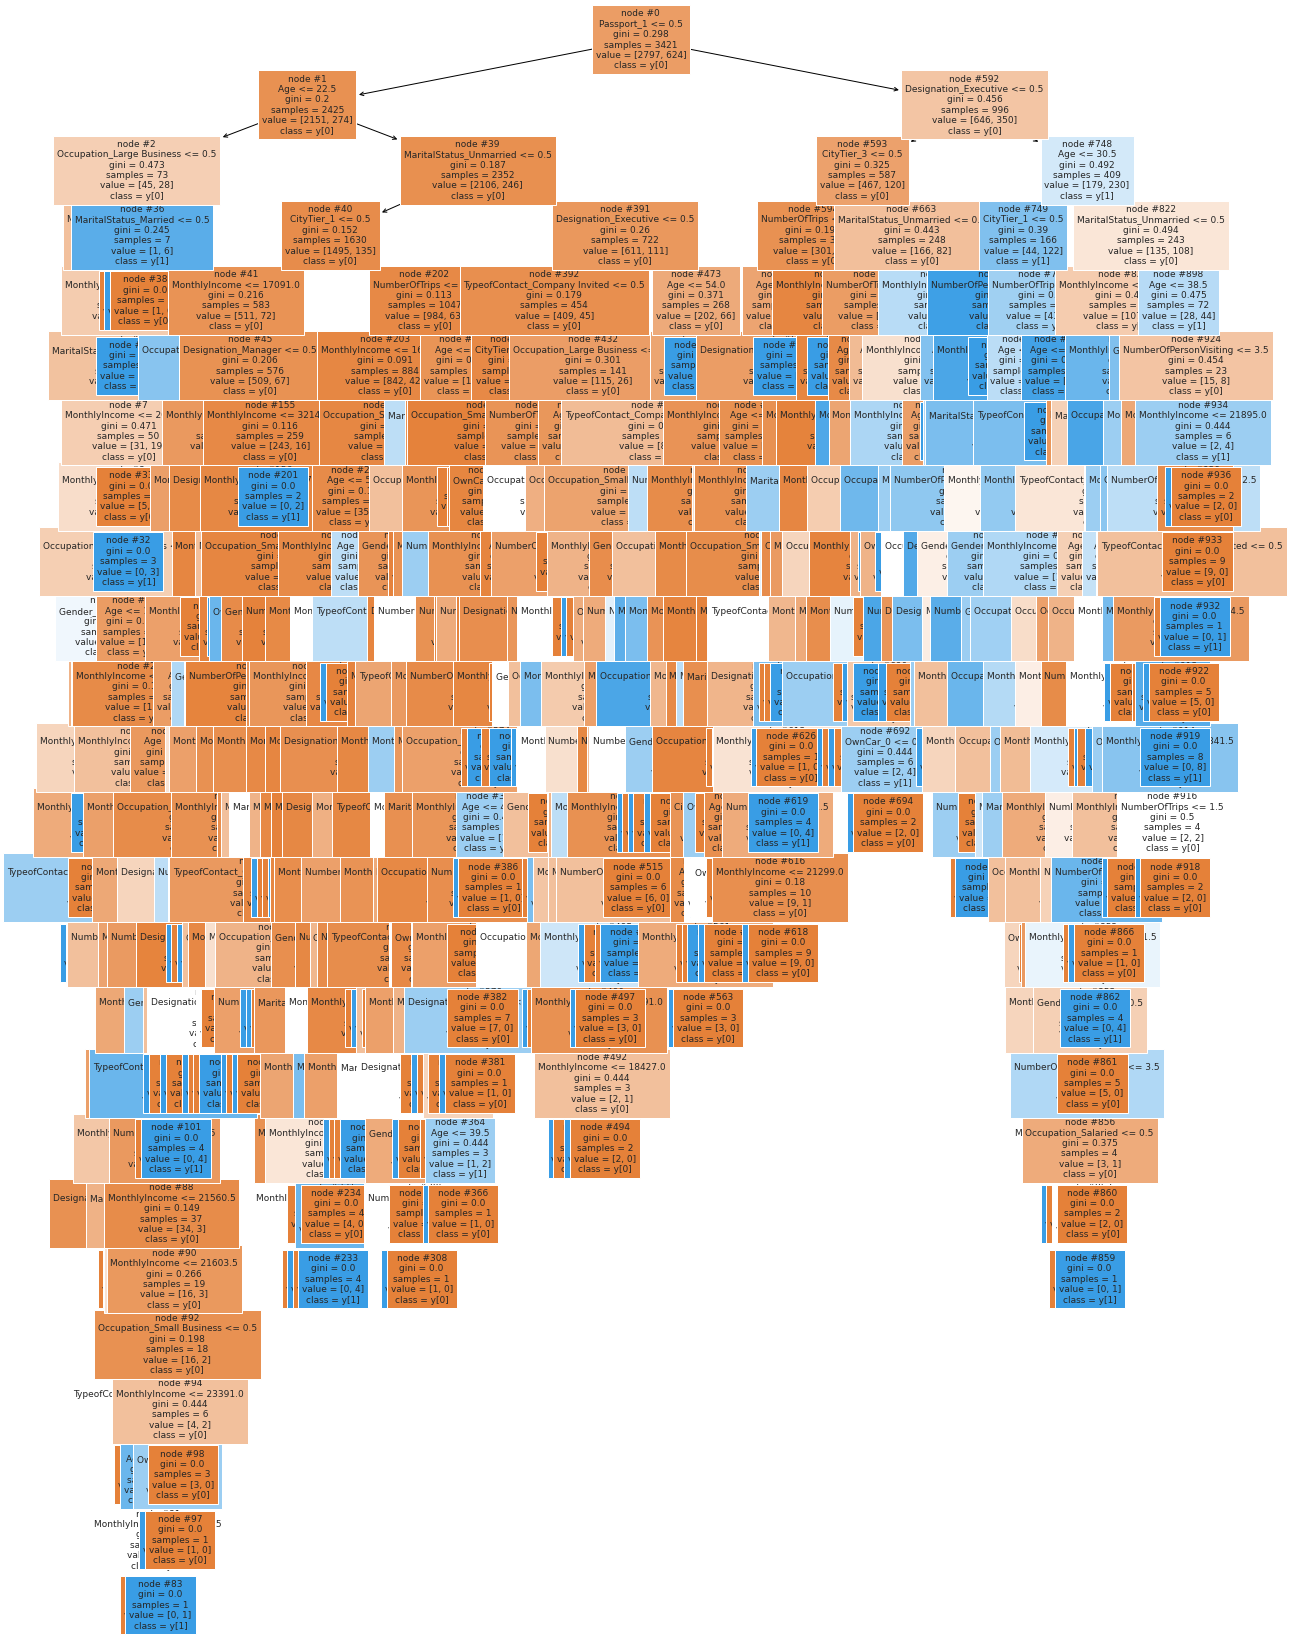

In [ ]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dtree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], \
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                Imp
MonthlyIncome                 0.252
Age                           0.209
NumberOfTrips                 0.083
Passport_1                    0.079
Designation_Executive         0.076
MaritalStatus_Unmarried       0.037
Gender_Female                 0.033
NumberOfPersonVisiting        0.031
CityTier_3                    0.025
Occupation_Salaried           0.023
Occupation_Large Business     0.023
TypeofContact_Company Invited 0.020
Occupation_Small Business     0.018
OwnCar_0                      0.016
Designation_Senior Manager    0.015
CityTier_1                    0.012
OwnCar_1                      0.010
MaritalStatus_Married         0.010
Gender_Male                   0.010
TypeofContact_Self Enquiry    0.007
Designation_Manager           0.006
MaritalStatus_Divorced        0.003
Designation_VP                0.002
Designation_AVP               0.001
Passport_0                    0.000
Occupation_Free Lancer        0.000
CityTier_2                  

The 3 most important features are Monthly Income, Age, Number of Trips

**Trying to fitting the model using BaggingClassifier()**

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


BaggingClassifier(random_state=1, verbose=1)

In [ ]:
Bagging_score=bagging_classifier.score(X_test, y_test)
print(Bagging_score)
Bagging_score=bagging_classifier.score(X_train, y_train)
print(Bagging_score)

0.89093387866394
0.9897690733703596


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
y_predi = bagging_classifier.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_predi)
print(confusion_matrix)
#True Positive is 1141
#True Negative is 30
#False Positive is 130
#False Negative is 166

[[1141   30]
 [ 130  166]]


In [ ]:
#Evaluate the model using other performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predi))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1171
           1       0.85      0.56      0.67       296

    accuracy                           0.89      1467
   macro avg       0.87      0.77      0.80      1467
weighted avg       0.89      0.89      0.88      1467



Model is still overfit

**Random Forest Classifier**

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
rf_score=rf_estimator.score(X_test, y_test)
print(rf_score)
rf_score=rf_estimator.score(X_train, y_train)
print(rf_score)

0.8916155419222904
1.0


In [ ]:
y_pred= rf_estimator.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#True Positive is 1150
#True Negative is 21
#False Positive is 138
#False Negative is 158

[[1150   21]
 [ 138  158]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1171
           1       0.88      0.53      0.67       296

    accuracy                           0.89      1467
   macro avg       0.89      0.76      0.80      1467
weighted avg       0.89      0.89      0.88      1467



Overfitted

**Model scores comparison**

In [ ]:
'''comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'pink',axis = 0) '''

"comparison_frame = pd.DataFrame({'Model':['Decision Tree',\n                                          'Bagging Classifier',\n                                          'Random Forest',\n                                          ], \n                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,\n                                          'Train_Recall':recall_train,'Test_Recall':recall_test,\n                                          'Train_Precision':precision_train,'Test_Precision':precision_test,\n                                          'Train_F1':f1_train,\n                                          'Test_F1':f1_test  }) \n\n#Sorting models in decreasing order of test recall\ncomparison_frame.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'pink',axis = 0) "

# **Model Score Comparison**

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))


In [ ]:
from sklearn import model_selection

LR: 0.838066 (0.027789)
DTC: 0.869925 (0.014242)
RFC: 0.883078 (0.023263)
BC: 0.885415 (0.020451)


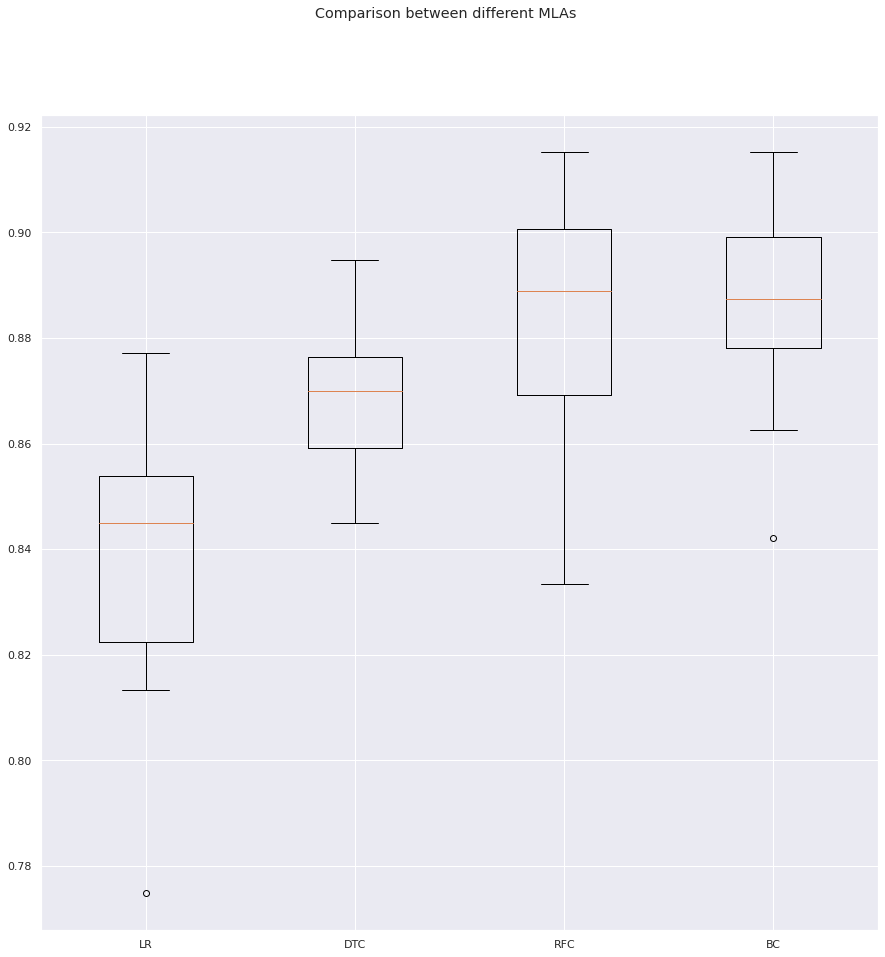

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **Model Tuning**

Decision Tree Tuning

In [ ]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       min_impurity_decrease=0.001, min_samples_leaf=10,
                       random_state=1)

In [ ]:
dt_score = dtree_tuned.score(X_train, y_train)
dt_score
dt_score = dtree_tuned.score(X_test, y_test)
dt_score

0.7389229720518065

In [ ]:
y_pred= dtree_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1171
           1       0.42      0.73      0.53       296

    accuracy                           0.74      1467
   macro avg       0.67      0.74      0.68      1467
weighted avg       0.82      0.74      0.76      1467



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#True Positive is 1150
#True Negative is 21
#False Positive is 138
#False Negative is 158

[[867 304]
 [ 79 217]]


In [ ]:
'''plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()'''


"plt.figure(figsize=(15,10))\nfeature_names = X_train.columns\nout = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])\nfor o in out:\n    arrow = o.arrow_patch\n    if arrow is not None:\n        arrow.set_edgecolor('black')\n        arrow.set_linewidth(1)\nplt.show()"

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
dataframe=pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Passport_0                    0.232
Age                           0.139
Designation_Executive         0.133
MonthlyIncome                 0.115
NumberOfTrips                 0.087
MaritalStatus_Unmarried       0.075
CityTier_3                    0.056
Occupation_Small Business     0.027
TypeofContact_Company Invited 0.023
Occupation_Salaried           0.022
CityTier_1                    0.019
Designation_Manager           0.014
Gender_Female                 0.013
Designation_Senior Manager    0.012
OwnCar_1                      0.012
Gender_Male                   0.006
Designation_AVP               0.005
MaritalStatus_Divorced        0.005
NumberOfPersonVisiting        0.004
MaritalStatus_Married         0.000
Occupation_Large Business     0.000
Occupation_Free Lancer        0.000
Passport_1                    0.000
OwnCar_0                      0.000
CityTier_2                    0.000
TypeofContact_Self Enquiry    0.000
Designation_VP              

recall improvrd
accuracy lower than base accuracy

passport status, age, executive designation, and monthly income are the top 4 most important features


**Retrain model**

In [ ]:
'''new_x =df[['Passport','Age','MonthlyIncome', 'Designation']]
y=df['ProdTaken']'''

"new_x =df[['Passport','Age','MonthlyIncome', 'Designation']]\ny=df['ProdTaken']"

In [ ]:
'''print(new_x.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.30, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Percentage of classes in training set:\n', y_train.value_counts(normalize=True)*100)
print('Percentage of classes in test set:\n', y_test.value_counts(normalize=True)*100)'''

"print(new_x.shape, y.shape)\nX_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.30, random_state=1)\n\nprint(X_train.shape, X_test.shape, y_train.shape, y_test.shape)\nprint('Percentage of classes in training set:\n', y_train.value_counts(normalize=True)*100)\nprint('Percentage of classes in test set:\n', y_test.value_counts(normalize=True)*100)"

In [ ]:
'''X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
X_train.info()
X_test.info()'''

'X_train=pd.get_dummies(X_train)\nX_test=pd.get_dummies(X_test)\nX_train.info()\nX_test.info()'

In [ ]:
'''dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
print(dtree.score(X_test, y_test))

print(dtree.score(X_train, y_train))'''

'dtree=DecisionTreeClassifier(random_state=1)\ndtree.fit(X_train,y_train)\nprint(dtree.score(X_test, y_test))\n\nprint(dtree.score(X_train, y_train))'

In [ ]:
'''clf=LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))'''

'clf=LogisticRegression()\nclf.fit(X_train, y_train)\ny_pred=clf.predict(X_test)\nfrom sklearn.metrics import confusion_matrix\nconfusion_matrix= confusion_matrix(y_test, y_pred)\nprint(confusion_matrix)\nfrom sklearn.metrics import classification_report\nprint(classification_report(y_test, y_pred))'

**Decision Tree : Cost Complexity Pruning**

Cost Complexity Pruning-
provide parameter to prevent a tree form overfitting.
provide another option/parameter(cost complexity parameter, ccp_alpha) to control size of a tree.
Greater values of ccp_alpha increase the number of nodes pruned.


In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path).T

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
ccp_alphas,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.002,0.002,0.002,0.002,0.002,0.003,0.005,0.005,0.018,0.023
impurities,0.000,0.001,0.002,0.002,0.003,0.003,0.004,0.004,0.005,0.006,...,0.221,0.224,0.228,0.232,0.239,0.242,0.247,0.257,0.275,0.298


In [ ]:
'''fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()'''

'fig, ax = plt.subplots(figsize=(10,5))\nax.plot(ccp_alphas[:-1], impurities[:-1], marker=\'o\', drawstyle="steps-post")\nax.set_xlabel("effective alpha")\nax.set_ylabel("total impurity of leaves")\nax.set_title("Total Impurity vs effective alpha for training set")\nplt.show()'

# Random forest tuning

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1)

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

parameters = {  
    'max_depth': list(np.arange(5,30,5)) + [None],
    'max_features': ['sqrt','log2',None],
    'min_samples_leaf': np.arange(1,15,5),
    'min_samples_split': np.arange(2, 20, 5),
    'n_estimators': np.arange(10,110,10)}

In [ ]:
rf_score=rf_tuned.score(X_test, y_test)
print(rf_score)
rf_score=rf_tuned.score(X_train, y_train)
print(rf_score)

from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.8916155419222904
1.0
[[867 304]
 [ 79 217]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1171
           1       0.42      0.73      0.53       296

    accuracy                           0.74      1467
   macro avg       0.67      0.74      0.68      1467
weighted avg       0.82      0.74      0.76      1467



Random forest is overfitted

# **Model Building: Boosting**

# Build AdaBoost Model

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
y_pred = ab_classifier.predict(X_test)
ab_score = ab_classifier.score(X_train, y_train)
print(ab_score)
ab_score = ab_classifier.score(X_test, y_test)
print(ab_score)

0.8491669102601579
0.820040899795501


In [ ]:

from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1128   43]
 [ 221   75]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1171
           1       0.64      0.25      0.36       296

    accuracy                           0.82      1467
   macro avg       0.74      0.61      0.63      1467
weighted avg       0.80      0.82      0.79      1467



In [ ]:
feature_names = X_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(ab_classifier.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
MonthlyIncome                 0.480
Age                           0.160
NumberOfPersonVisiting        0.060
Passport_1                    0.040
Designation_VP                0.040
NumberOfTrips                 0.040
TypeofContact_Self Enquiry    0.020
Designation_Senior Manager    0.020
Designation_Executive         0.020
Occupation_Large Business     0.020
Occupation_Salaried           0.020
Designation_AVP               0.020
Gender_Male                   0.020
CityTier_1                    0.020
MaritalStatus_Unmarried       0.020
Designation_Manager           0.000
OwnCar_1                      0.000
OwnCar_0                      0.000
MaritalStatus_Married         0.000
Passport_0                    0.000
MaritalStatus_Divorced        0.000
TypeofContact_Company Invited 0.000
Occupation_Small Business     0.000
Occupation_Free Lancer        0.000
CityTier_3                    0.000
CityTier_2                    0.000
Gender_Female               

# **Gradient Boosting**

# Build Gradient Boost Model

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)
y_pred = gb_classifier.predict(X_test)
gb_score = gb_classifier.score(X_train, y_train)
print(gb_score)
gb_score = gb_classifier.score(X_test, y_test)
print(gb_score)


from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.8798596901490792
0.8500340831629175
[[1140   31]
 [ 189  107]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1171
           1       0.78      0.36      0.49       296

    accuracy                           0.85      1467
   macro avg       0.82      0.67      0.70      1467
weighted avg       0.84      0.85      0.83      1467



In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gb_classifier.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
MonthlyIncome                 0.174
Designation_Executive         0.172
Age                           0.159
Passport_0                    0.112
Passport_1                    0.110
MaritalStatus_Unmarried       0.085
CityTier_3                    0.047
NumberOfTrips                 0.032
CityTier_1                    0.015
Occupation_Large Business     0.015
NumberOfPersonVisiting        0.010
TypeofContact_Company Invited 0.009
Occupation_Small Business     0.009
Designation_Senior Manager    0.008
TypeofContact_Self Enquiry    0.007
Gender_Male                   0.005
CityTier_2                    0.005
Occupation_Salaried           0.004
Designation_Manager           0.004
Gender_Female                 0.004
Designation_AVP               0.004
MaritalStatus_Divorced        0.003
Occupation_Free Lancer        0.002
Designation_VP                0.002
MaritalStatus_Married         0.001
OwnCar_1                      0.000
OwnCar_0                    

# **eXtreme Gradient Boosting**
# Build XGBoost Model

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

y_pred = xgb_classifier.predict(X_test)
xgb_score = xgb_classifier.score(X_train, y_train)
print(xgb_score)
xgb_score = xgb_classifier.score(X_test, y_test)
print(xgb_score)


from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.8745980707395499
0.8486707566462167
[[1138   33]
 [ 189  107]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1171
           1       0.76      0.36      0.49       296

    accuracy                           0.85      1467
   macro avg       0.81      0.67      0.70      1467
weighted avg       0.84      0.85      0.83      1467



In [ ]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gb_classifier.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
MonthlyIncome                 0.174
Designation_Executive         0.172
Age                           0.159
Passport_0                    0.112
Passport_1                    0.110
MaritalStatus_Unmarried       0.085
CityTier_3                    0.047
NumberOfTrips                 0.032
CityTier_1                    0.015
Occupation_Large Business     0.015
NumberOfPersonVisiting        0.010
TypeofContact_Company Invited 0.009
Occupation_Small Business     0.009
Designation_Senior Manager    0.008
TypeofContact_Self Enquiry    0.007
Gender_Male                   0.005
CityTier_2                    0.005
Occupation_Salaried           0.004
Designation_Manager           0.004
Gender_Female                 0.004
Designation_AVP               0.004
MaritalStatus_Divorced        0.003
Occupation_Free Lancer        0.002
Designation_VP                0.002
MaritalStatus_Married         0.001
OwnCar_1                      0.000
OwnCar_0                    

Till now, the best model is Tuned Random Forest.

# **Model Tuning: Boosting Models**
# AdaBoost Tuning

In [ ]:
ab_tuned = AdaBoostClassifier(random_state=1)
#ab_classifier.fit(X_train,y_train)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)


# Type of scoring used to compare parameter  combinations
ab_score = ab_tuned.score(X_train, y_train)
print(ab_score)
ab_score = ab_tuned.score(X_test, y_test)
print(ab_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_





0.8491669102601579
0.820040899795501


In [ ]:
y_pred = ab_tuned.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1084   87]
 [ 123  173]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1171
           1       0.67      0.58      0.62       296

    accuracy                           0.86      1467
   macro avg       0.78      0.76      0.77      1467
weighted avg       0.85      0.86      0.85      1467



# Gradient Boost tuning

In [ ]:
gb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)
# Type of scoring used to compare parameter  combinations
gb_score = gb_tuned.score(X_train, y_train)
print(gb_score)
gb_score = gb_tuned.score(X_test, y_test)
print(gb_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_



0.8745980707395499
0.8486707566462167


In [ ]:
y_pred = gb_tuned.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[926 245]
 [ 86 210]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1171
           1       0.46      0.71      0.56       296

    accuracy                           0.77      1467
   macro avg       0.69      0.75      0.70      1467
weighted avg       0.82      0.77      0.79      1467



In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gb_classifier.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
MonthlyIncome                 0.174
Designation_Executive         0.172
Age                           0.159
Passport_0                    0.112
Passport_1                    0.110
MaritalStatus_Unmarried       0.085
CityTier_3                    0.047
NumberOfTrips                 0.032
CityTier_1                    0.015
Occupation_Large Business     0.015
NumberOfPersonVisiting        0.010
TypeofContact_Company Invited 0.009
Occupation_Small Business     0.009
Designation_Senior Manager    0.008
TypeofContact_Self Enquiry    0.007
Gender_Male                   0.005
CityTier_2                    0.005
Occupation_Salaried           0.004
Designation_Manager           0.004
Gender_Female                 0.004
Designation_AVP               0.004
MaritalStatus_Divorced        0.003
Occupation_Free Lancer        0.002
Designation_VP                0.002
MaritalStatus_Married         0.001
OwnCar_1                      0.000
OwnCar_0                    

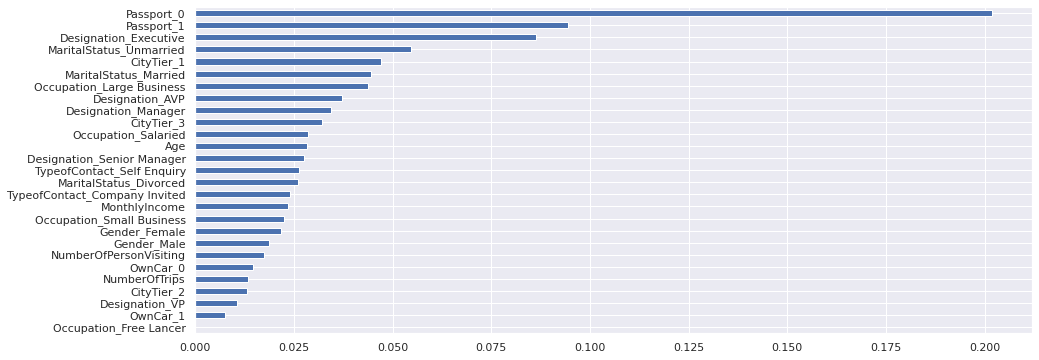

In [ ]:
imp =pd.Series(importances,index=X_train.columns).sort_values()
plt.figure(figsize=(15,6))
imp.plot.barh()
plt.show()

**Final model**

**Build Model 1(Xgb tunung)**

In [ ]:
estimators_1 = [('Gb Boosting',gb_tuned), ('Ada Boosting',ab_tuned), ('Decision Tree',dtree_tuned), ('Random Forest',rf_tuned) ]

final_estimator = gb_tuned

stacking_classifier= StackingClassifier(estimators=estimators_1,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Gb Boosting',
                                XGBClassifier(colsample_bylevel=0.7,
                                              colsample_bytree=0.9,
                                              eval_metric='logloss',
                                              learning_rate=0.2,
                                              n_estimators=50, random_state=1,
                                              scale_pos_weight=5,
                                              subsample=0.9)),
                               ('Ada Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.5000000000000002,
                                                   n_estimators=100,
                                                   random_...
                                DecisionTreeClassifier(class_weight={0: 0.19,
                             

In [ ]:
stacking_classifier_score = stacking_classifier.score(X_train, y_train)
print(stacking_classifier_score)
stacking_classifier_score = stacking_classifier.score(X_test, y_test)
print(stacking_classifier_score)

y_pred = stacking_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9944460684010523
0.8643490115882754
[[1019  152]
 [  47  249]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1171
           1       0.62      0.84      0.71       296

    accuracy                           0.86      1467
   macro avg       0.79      0.86      0.81      1467
weighted avg       0.89      0.86      0.87      1467



**Build Model 2(rf tuned)**

In [ ]:
estimators_2 = [('Gb Boosting',gb_tuned), ('Ada Boosting',ab_tuned), ('Decision Tree',dtree_tuned) ]

final_estimator = rf_tuned

stacking_classifier_2= StackingClassifier(estimators=estimators_2,final_estimator=final_estimator)

stacking_classifier_2.fit(X_train,y_train)

StackingClassifier(estimators=[('Gb Boosting',
                                XGBClassifier(colsample_bylevel=0.7,
                                              colsample_bytree=0.9,
                                              eval_metric='logloss',
                                              learning_rate=0.2,
                                              n_estimators=50, random_state=1,
                                              scale_pos_weight=5,
                                              subsample=0.9)),
                               ('Ada Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.5000000000000002,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassif

In [ ]:
stacking_classifier_score = stacking_classifier_2.score(X_train, y_train)
print(stacking_classifier_score)
stacking_classifier_score = stacking_classifier_2.score(X_test, y_test)
print(stacking_classifier_score)

y_pred = stacking_classifier_2.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9330605086232096
0.863667348329925
[[1119   52]
 [ 148  148]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1171
           1       0.74      0.50      0.60       296

    accuracy                           0.86      1467
   macro avg       0.81      0.73      0.76      1467
weighted avg       0.85      0.86      0.85      1467



**Build Model 3(rf_tuned)**

In [ ]:
estimators_3 = [('Gb Boosting',gb_tuned), ('XGB',gb_tuned) ]

final_estimator_3 = rf_tuned

stacking_classifier_3= StackingClassifier(estimators=estimators_3,final_estimator=final_estimator_3)

stacking_classifier_3.fit(X_train,y_train)

StackingClassifier(estimators=[('Gb Boosting',
                                XGBClassifier(colsample_bylevel=0.7,
                                              colsample_bytree=0.9,
                                              eval_metric='logloss',
                                              learning_rate=0.2,
                                              n_estimators=50, random_state=1,
                                              scale_pos_weight=5,
                                              subsample=0.9)),
                               ('XGB',
                                XGBClassifier(colsample_bylevel=0.7,
                                              colsample_bytree=0.9,
                                              eval_metric='logloss',
                                              learning_rate=0.2,
                                              n_estimators=50, random_state=1,
                                              scale_pos_weight=5,
                   

In [ ]:
stacking_classifier_score = stacking_classifier_3.score(X_train, y_train)
print(stacking_classifier_score)
stacking_classifier_score = stacking_classifier_3.score(X_test, y_test)
print(stacking_classifier_score)

y_pred = stacking_classifier_3.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.7977199649225373
0.7791411042944786
[[1022  149]
 [ 175  121]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1171
           1       0.45      0.41      0.43       296

    accuracy                           0.78      1467
   macro avg       0.65      0.64      0.65      1467
weighted avg       0.77      0.78      0.78      1467



# **Conclusion**

Tuned Gradient boost provides a very generalized model, with descent test recall of 36%
 
Tuned Gradient boost provides best recall on test of 77%, however, the test accuracy is only 75%, which is much lower than the base accuracy

Stacking Classifier with Tuned Gradient Boosting, Tuned Adaptive Boosting, Tuned Random Forest and Tuned Decision Tree as base estimators and Tuned eXtreme Gradient Boosting as final estimator, provides 87% recall on test and generalize well enough to close the gap between Train and Test accuracy to 3%

- Accuracy of the model: 99.4% - 86.4% - Recall of the model: 87% - 84.0%



# **Conclusion on Feature Importance**
Looking at feature importance, Designation, Passport, City Tier , Martial status, Occupation are most important features. Income and Age can also be looked into, some of the models have given higher importance to these.
 
Gender, number of children visiting, owning a car appears to be insignificant.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Business Recommendations and Insights**
1. Designation, Passport, City Tier , Martial status, Occupation are most important features. Income and Age can also be looked into, some of the models have given higher importance to these.

2. Customers who have passport and are from tier 3 city and are single or unmarried, have large business, have higher chances of taking new package.



In [ ]:
a, b, c, e =50, 3, 3, 0
while(c>0):
  d=a%b
  e=e+d+a
  c=c-1

print(e)

156


In [ ]:
for i in range(1,7):
  for j in range(i,6):
    print(" ")
    for k in range(1, i*2):
      print("*")
    

 
*
 
*
 
*
 
*
 
*
 
*
*
*
 
*
*
*
 
*
*
*
 
*
*
*
 
*
*
*
*
*
 
*
*
*
*
*
 
*
*
*
*
*
 
*
*
*
*
*
*
*
 
*
*
*
*
*
*
*
 
*
*
*
*
*
*
*
*
*


In [ ]:
a=0 
for i in range(0,4):
  a=a+1
  if(i==3):
    print("hello")
  
print(a)

hello
4


In [ ]:
#include<stdio.h>

int

f (int n)

{

  static int a = 0;

  if (n <= 0)

    {

      return 1;

    }

  if (n > 3)

    {

      a = n;

      return f (n - 2) + 2;

    }

  return f (n - 1) + a;

}



int main ()

{

  printf ("Result: %d", f (5));

  return 0;

}

In [ ]:
a=16
if((a%10) == 0):
  a=a*2
elif((a%5)==0):
  a=a/5
else:
  a=a-1
print(a)

15


In [ ]:
integer a,b;

Set a=2; b=50;

while(b>0)

a = b%2 + a;

if( a MOD 2 Is Equal To 0)

Printf a

else

Print b-1

b = b/5

a=a+1

End while

In [ ]:
import pandas as pd
arr= pd.array(2, 3, 56, 34)
a=3
n=4
for k in range(0,n):
  arr[n]=arr[0]
  for j in range(0,n):
    arr[j]=arr[j+1]

for k in range(0, n):
  print(arr[k])

TypeError: ignored

In [ ]:
x=3

y=90

while(y>0):

y=y//3

x=x+6

c=x+y

while(c>30):

if(c % 3 == 0):

print(x)

else:

print (y)

c=c//5

print(c)